In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [12]:
df = pd.read_csv('/content/covtype.data.gz')


In [7]:
print(df.columns)
print(df.head)

Index(['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1',
       '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10',
       '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5'],
      dtype='object')
<bound method NDFrame.head of         2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  \
0       2590   56   2  212   -6   390  220  235  151  6225  ...     0     0   
1       2804  139   9  268   65  3180  234  238  135  6121  ...     0     0   
2       2785  155  18  242  118  3090  238  238  122  6211  ...     0     0   
3       2595   45   2  153   -1   391  220  234  150  6172  ...     0     0   
4       2579  132   6  300  -15    67  230  237  140  6031  ...     0     0   
...      ...  ...  .

In [ ]:
feature_columns = [f'feature_{i}' for i in range(1, 55)]
target_column = 'Cover_Type'
df.columns = feature_columns + [target_column]
print("\nRenamed columns:")
print(df.columns)
print(f"\nTarget variable value counts:\n{df[target_column].value_counts()}")

print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (581011, 55)

First 5 rows:
   2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

Target column name: 5

Missing values:
2596    0
51      0
3       0
258     0
0       0
510     0
221     0
232     0
148     0
6279    0
1       0
0.1     0
0.2     0
0.3     0
0.4     0
0.5  

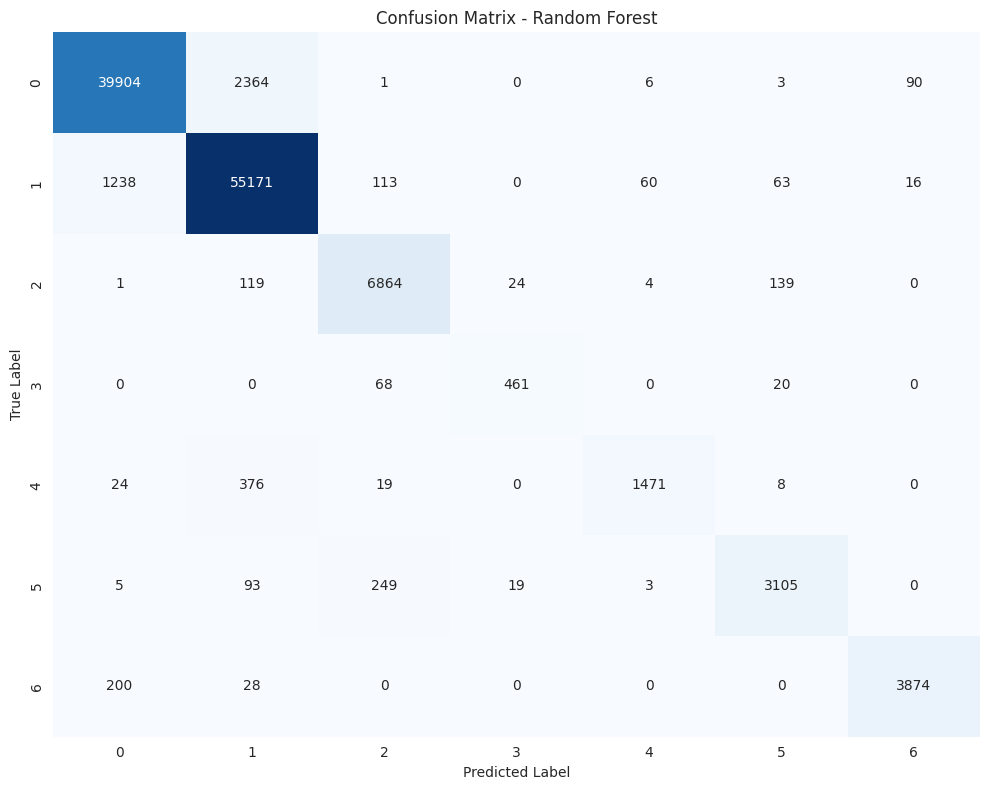

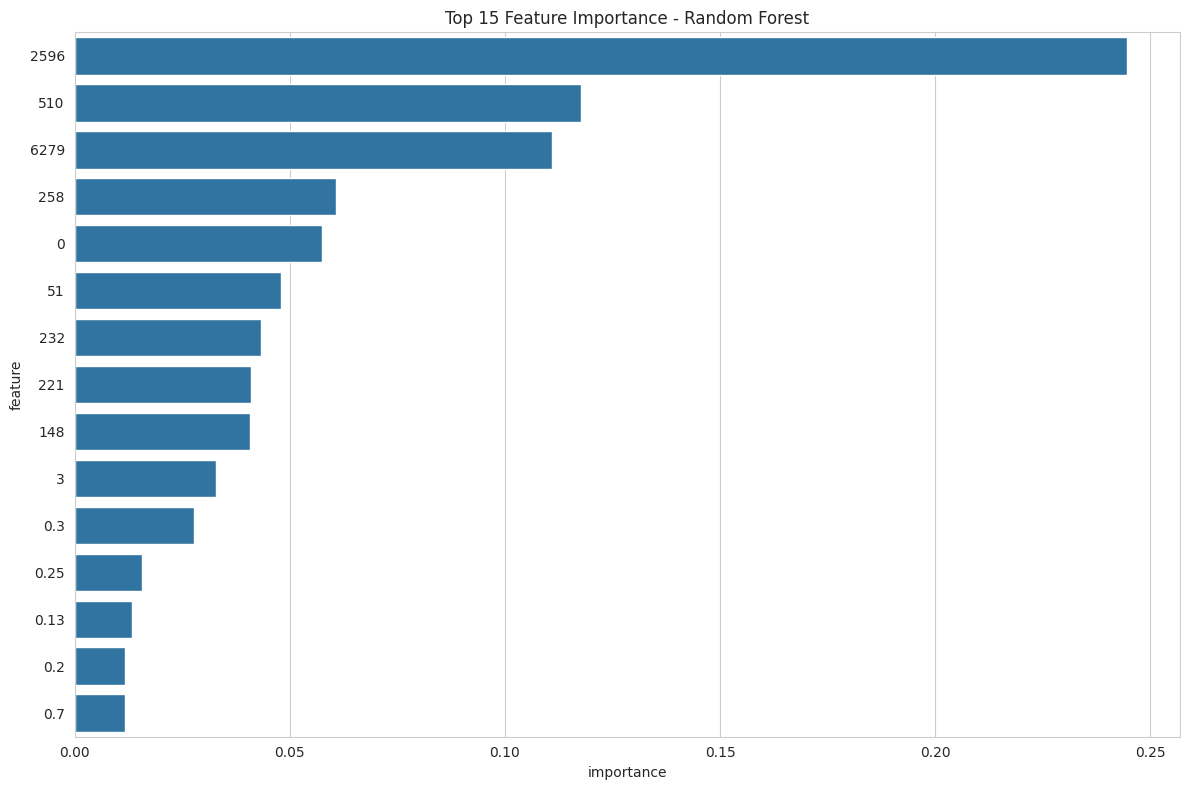

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Set style for visualizations
plt.style.use('default')
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv('/content/covtype.data.gz')

# 1. Data Exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# The last column is the target variable (Cover_Type)
# Let's identify which column is the target
# Based on your output, the last column is named '5'
target_column = df.columns[-1]  # This gets the last column name
print(f"\nTarget column name: {target_column}")

# 2. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# 3. Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target value counts:\n{y.value_counts()}")

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 5. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train a Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# 7. Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# 8. Visualize confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 9. Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()



